# Homework 6: Confidence Intervals, Central Limit Theorem, and A/B Testing

This assignment is due Friday, June 8 11:59PM. Directly sharing answers is not okay, but discussing problems with other students is encouraged.

Reading:
- [Confidence intervals](https://www.inferentialthinking.com/chapters/13/3/Confidence_Intervals.html) 
- [Interpreting confidence intervals](https://www.inferentialthinking.com/chapters/13/4/Using_Confidence_Intervals.html) 
- [SD and normal curve](https://www.inferentialthinking.com/chapters/14/3/SD_and_the_Normal_Curve.html)
- [Central Limit Theorem](https://www.inferentialthinking.com/chapters/14/4/Central_Limit_Theorem.html) 
- [Choosing a sample size](https://www.inferentialthinking.com/chapters/14/6/Choosing_a_Sample_Size.html)
- [A/B testing](https://www.inferentialthinking.com/chapters/12/1/AB_Testing.html)

Run the cell below to prepare the notebook and the tests. **Passing the automatic tests does not guarantee full credit on any question.** The tests are provided to help catch some common errors, but it is *your* responsibility to answer the questions correctly.

In [1]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from client.api.notebook import Notebook
ok = Notebook('hw06.ok')
_ = ok.auth(inline=True)

/usr/local/lib/python3.8/site-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/usr/local/lib/python3.8/site-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


Assignment: Homework 6: Confidence Intervals, Central Limit Theorem, and A/B Testing
OK, version v1.14.20



ERROR  | auth.py:102 | {'error': 'invalid_grant'}



Open the following URL:

https://okpy.org/client/login/

After logging in, copy the code from the web page and paste it into the box.
Then press the "Enter" key on your keyboard.

Paste your code here: mRLqSKahckDxMWPJX3Jco5E02sA1wU
Successfully logged in as A01631920@itesm.mx


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission.

## 1. Plot the Vote


Four candidates are running for President of Dataland. A polling company surveys 1000 people selected uniformly at random from among voters in Dataland, and it asks each one who they are planning on voting for. After compiling the results, the polling company releases the following proportions from their sample:

|Candidate  | Proportion|
|:------------:|:------------:|
|Candidate C | 0.47 |
|Candidate T | 0.38 |
|Candidate J | 0.08 |
|Candidate S | 0.03 |
|Undecided   | 0.04 |

These proportions represent a uniform random sample of the population of Dataland. We will attempt to estimate the corresponding *population parameters* - the proportions of each kind of voter in the entire population.  We will use confidence intervals to compute a range of values that reflects the uncertainty of our estimate.

The table `voters` contains the results of the survey. Candidates are represented by their initials. Undecided voters are denoted by `U`.

In [2]:
votes = Table().with_column('vote', np.array(['C']*470 + ['T']*380 + ['J']*80 + ['S']*30 + ['U']*40))
num_votes = votes.num_rows
votes.sample()

vote
T
J
T
U
T
T
C
T
T
C


Below, we have give you code that will use bootstrapped samples to compute estimates of the true proportion of voters who are planning on voting for **Candidate C**.

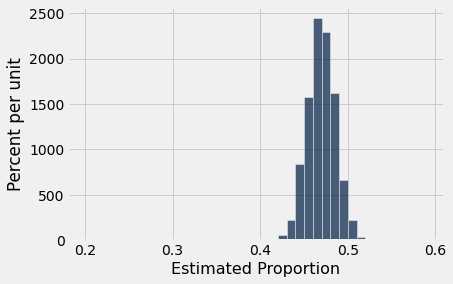

In [3]:
def proportions_in_resamples():
    statistics = make_array()
    for i in np.arange(5000):
        bootstrap = votes.sample()
        sample_statistic = np.count_nonzero(bootstrap.column('vote') == 'C')/num_votes
        statistics = np.append(statistics, sample_statistic)
    return statistics

sampled_proportions = proportions_in_resamples()
Table().with_column('Estimated Proportion', sampled_proportions).hist(bins=np.arange(0.2,0.6,0.01))

**Question 1.** Using the array `sampled_proportions`, compute an approximate 95% confidence interval for the true proportions of voters planning on voting for candidate C.  (Compute the lower and upper ends of the interval, named `lower_bound` and `upper_bound`, respectively.)

In [4]:
c_lower_bound = percentile(2.5, sampled_proportions)
c_upper_bound = percentile(97.5, sampled_proportions)
print("Bootstrapped 95% confidence interval for the proportion of C voters in the population: [{:f}, {:f}]".format(c_lower_bound, c_upper_bound))

Bootstrapped 95% confidence interval for the proportion of C voters in the population: [0.440000, 0.502000]


In [5]:
_ = ok.grade('q1_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** The survey results seem to indicate that Candidate C is beating Candidate T among voters. We would like to use CI's to determine a range of likely values for her true *lead*. Candidate C's lead over Candidate T is:

$$\text{Candidate C's proportion of the vote} - \text{Candidate T's proportion of the vote}.$$

Using the function `proportions_in_resamples` above as a model, use the bootstrap to compute an approximate distribution for Candidate C's lead over Candidate T. Plot a histogram of the the resulting samples.

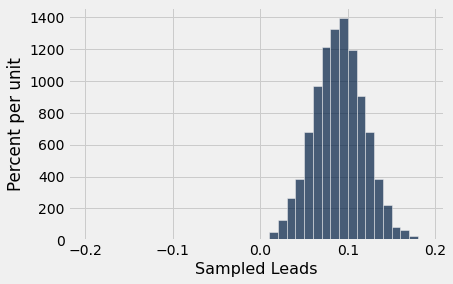

In [6]:
bins = bins=np.arange(-0.2,0.2,0.01)

def leads_in_resamples():
    statistics = make_array()
    for _ in range(5000):
        b = votes.sample()
        prop_c = np.count_nonzero(b.column("vote") == "C")/num_votes
        prop_t = np.count_nonzero(b.column("vote") == "T")/num_votes
        diff = prop_c-prop_t
        statistics = np.append(statistics, diff)
    return statistics

sampled_leads = leads_in_resamples()
Table().with_column("Sampled Leads", sampled_leads).hist(bins = bins)

In [7]:
diff_lower_bound = percentile(2.5, sampled_leads)
diff_upper_bound = percentile(97.5, sampled_leads)
print("Bootstrapped 95% confidence interval for Candidate C's true lead over Candidate T: [{:f}, {:f}]".format(diff_lower_bound, diff_upper_bound))

Bootstrapped 95% confidence interval for Candidate C's true lead over Candidate T: [0.033000, 0.147000]


In [8]:
_ = ok.grade('q1_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 2. Interpreting Confidence Intervals


The staff computed the following 95% confidence interval for the proportion of Candidate C voters: 

$$[.439, .5]$$

(Your answer might have been different; that doesn't mean it was wrong.)

#### Question 1
Can we say that 95% of the population lies in the range $[.439, .5]$? Explain your answer. 

This is not correct as we aren't testing the proportion of candidate C

#### Question 2
Can we say that there is a 95% probability that the interval [.439, .5] contains the true proportion of the population who is voting for Candidate C? Explain your answer.

Since the population we are testing is that of the candidate's votes, we can asume that the previous is correct



**The following is outside of the scope of this class. If you don't already know what Bayesian and Frequentist reasoning are, don't worry about it!**
(You may recall that there are different philosophical interpretation of probability. The Bayesian interpretation says that it *is* meaningful to talk about the probability that the interval covers the true proportion, but a Bayesian would perform a different calculation to calculate that number; we have no guarantee that it is 95%. All we are guaranteed is the statement in the answer to the next question.)

#### Question 3
Suppose we produced 10,000 new samples (each one a uniform random sample of 1,000 voters) and created a 95% confidence interval from each one. Roughly how many of those 10,000 intervals do you expect will actually contain the true proportion of the population?

9,500

**Question 4**

The staff also created 80%, 90%, and 99% confidence intervals from one sample, but we forgot to label which confidence interval represented which percentages! Match the interval to the percent of confidence the interval represents. (Write the percentage after each interval below.) **Then**, explain your thought process.

**Answers:**

$[.444,.495]$: 80% if we assume that the distibution is normal

$[.45,.49]$: 90%  its over thje 80% interval

$[.43,.511]$: 99% covers the range over 2 standard deviations

#### Question 5

Recall the second bootstrap confidence interval you created, estimating Candidate C's lead over Candidate T. Among voters in the sample, her lead was .09. The staff's 95% confidence interval for her true lead (in the population of all voters) was

$$[.032,.15].$$

Suppose we are interested in testing a simple yes-or-no question:

> "Are the candidates tied?"

Our null hypothesis is that the proportions are equal, or, equivalently, that Candidate C's lead is exactly 0. Our alternative hypothesis is that her lead is not equal to 0.  In the questions below, don't compute any confidence interval yourself - use only the staff's 95% confidence interval.


**Question:** Say we use a 5% P-value cutoff.  Do we reject the null, fail to reject the null, or are we unable to tell using our confidence interval?

Reject the null

#### Question 6
What if, instead, we use a P-value cutoff of 1%? Do we reject the null, fail to reject the null, or are we unable to tell using our confidence interval?

We're unavle to tell using our confidence interval

#### Question 7
What if we use a P-value cutoff of 10%? Do we reject, fail to reject, or are we unable to tell using our confidence interval?

Reject the null

## 3. Testing the Central Limit Theorem


The Central Limit Theorem tells us that the probability distribution of the sum or average of a large random sample drawn with replacement will be roughly normal, *regardless of the distribution of the population from which the sample is drawn*.

That's a pretty big claim, but the theorem doesn't stop there. It further states that the standard deviation of this normal distribution is given by $$\frac{\texttt{sd of the original distribution}}{\sqrt{\texttt{sample size}}}$$ In other words, suppose we start with *any distribution* that has standard deviation $x$, take a sample of size $n$ (where $n$ is a large number) from that distribution with replacement, and compute the mean of that sample. If we repeat this procedure many times, then those sample means will have a normal distribution with standard deviation $\frac{x}{\sqrt{n}}$.

That's an even bigger claim than the first one! The proof of the theorem is beyond the scope of this class, but in this exercise, we will be exploring some data to see the CLT in action.

<div class="hide">\pagebreak</div>
**Question 1.** The CLT only applies when sample sizes are "sufficiently large." This isn't a very precise statement. Is 10 large?  How about 50?  The truth is that it depends both on the original population distribution and just how "normal" you want the result to look. Let's use a simulation to get a feel for how the distribution of the sample mean changes as sample size goes up.

Consider a coin flip. If we say `Heads` is $1$ and `Tails` is $0$, then there's a 50% chance of getting a 1 and a 50% chance of getting a 0, which is definitely not a normal distribution.  The average of several coin tosses is equal to the proportion of heads in those coin tosses, so the CLT should apply if we compute the sample proportion of heads many times.

Write a function called `simulate_sample_n` that takes in a sample size $n$. It should return an array that contains 5000 sample proportions of heads, each from $n$ coin flips.

In [9]:
def sample_size_n(n):
    coin = make_array(0, 1)
    sample_proportions = make_array()
    for i in np.arange(5000):
        # An array of the results of n coin flips (0s and 1s):
        flips = np.random.choice(coin, n)
        sample_proportion = np.count_nonzero(flips == 0) / n
        sample_proportions = np.append(sample_proportions, sample_proportion)
    return sample_proportions


sample_size_n(5)

array([0.6, 0.4, 0.8, ..., 0.4, 0.4, 0.4])

<div class="hide">\pagebreak</div>
The code below will use the function you just defined to plot the empirical distribution of the sample mean for various sample sizes. Drag the slider or click on the number to the right to type in a sample size of your choice. The x- and y-scales are kept the same to facilitate comparisons. 

In [10]:
# Just run this cell
from ipywidgets import interact

def outer(f):
    def graph(x):
        bins = np.arange(-0.01,1.05,0.02)
        sample_proportions = f(x)
        Table().with_column('Sample Size: {}'.format(x), sample_proportions).hist(bins=bins)
        plots.ylim(0, 30)
        print('Sample SD:', np.std(sample_proportions))
        plots.show()
    return graph
    
interact(outer(sample_size_n), x=(0, 400, 1), continuous_update=False);

# Notice the shape of the graph as the sample size increases and decreases.
# Min sample size is 0, max is 400
# The graph will refresh a few times when you drag the slider around

interactive(children=(IntSlider(value=200, description='x', max=400), Output()), _dom_classes=('widget-interac…

You can see that even the means of samples of 10 items follow a roughly bell-shaped distribution.  A sample of 50 items looks quite bell-shaped.

<div class="hide">\pagebreak</div>
**Question 2:** In the plot for a sample size of 10, why are the bars spaced at intervals of .1, with gaps in between?

This happens because we obtained the intervals by dividing with the sample size (n)

<div class="hide">\pagebreak</div>
Now we will test the second claim of the CLT: That the SD of the sample mean is the SD of the original distribution, divided by the square root of the sample size.

We have imported the flight delay data and computed its standard deviation for you.

In [11]:
united = Table.read_table('united_summer2015.csv')
united_std = np.std(united.column('Delay'))
united_std

39.480199851609314

<div class="hide">\pagebreak</div>
**Question 3:** Write a function called `predict_sd`.  It takes a sample size `n` (a number) as its argument.  It returns the predicted standard deviation of the mean for samples of size `n` from the flight delays.

In [12]:
def predict_sd(n):
    result = united_std / pow(n, 0.5)
    return result

predict_sd(10)

12.484735400972708

In [13]:
_ = ok.grade('q3_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<div class="hide">\pagebreak</div>
**Question 4:** Write a function called `empirical_sd` that takes a sample size `n` as its argument. The function should simulate 500 samples of size `n` from the flight delays dataset, and it should return the standard deviation of the **means of those 500 samples**.

*Hint:* This function will be similar to the `sample_size_n` function you wrote earlier.

In [14]:
def empirical_sd(n):
    sample_means = make_array()
    for i in np.arange(500):
        sample = united.sample(n).column("Delay")
        sample_mean = np.mean(sample)
        sample_means = np.append(sample_means, sample_mean)
    return np.std(sample_means)

empirical_sd(10)

12.774615358592994

In [15]:
_ = ok.grade('q3_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Question 3_4 > Suite 1 > Case 1

>>> 30 <= empirical_sd(1) <= 50
False

# Error: expected
#     True
# but got
#     False

Run only this test case with "python3 ok -q q3_4 --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



<div class="hide">\pagebreak</div>
The cell below will plot the predicted and empirical SDs for the delay data for various sample sizes.

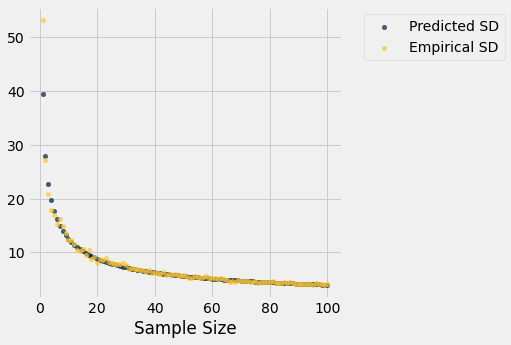

In [16]:
sd_table = Table().with_column('Sample Size', np.arange(1,101))
predicted = sd_table.apply(predict_sd, 'Sample Size')
empirical = sd_table.apply(empirical_sd, 'Sample Size')
sd_table = sd_table.with_columns('Predicted SD', predicted, 'Empirical SD', empirical)
sd_table.scatter('Sample Size')

<div class="hide">\pagebreak</div>
**Question 5:** The empirical SDs are very close to the predicted SDs, but they're not exactly the same.  Why?

Because we need a larger sample size as our central limit theorem states

## 4. Polling and the Normal Distribution


Michelle is a statistical consultant, and she works for a group that supports Proposition 68 (which would mandate labeling of all horizontal or vertical axes), called Yes on 68.  They want to know how many Californians will vote for the proposition.

Michelle polls a uniform random sample of all California voters, and she finds that 210 of the 400 sampled voters will vote in favor of the proposition.

In [17]:
sample = Table().with_columns(
    "Vote",  make_array("Yes", "No"),
    "Count", make_array(210,   190))
sample_size = sum(sample.column("Count"))
sample_proportions = sample.with_column(
    "Proportion", sample.column("Count") / sample_size)
sample_proportions

Vote,Count,Proportion
Yes,210,0.525
No,190,0.475


She uses 10,000 bootstrap resamples to compute a confidence interval for the proportion of all California voters who will vote Yes.  Run the next cell to see the empirical distribution of Yes proportions in the 10,000 resamples.

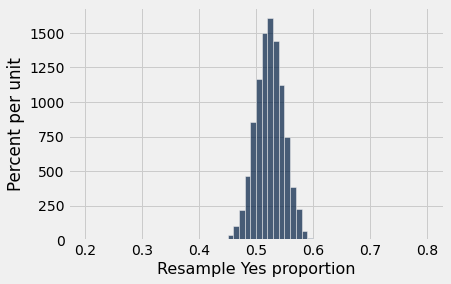

In [18]:
resample_yes_proportions = make_array()
for i in np.arange(10000):
    resample = proportions_from_distribution(sample_proportions, "Proportion", sample_size)
    resample_yes_proportions = np.append(resample_yes_proportions, resample.column("Random Sample").item(0))
Table().with_column("Resample Yes proportion", resample_yes_proportions).hist(bins=np.arange(.2, .8, .01))

<div class="hide">\pagebreak</div>
#### Question 1
Explain which distribution the Central Limit Theorem applies to in this story, and why.

It applies in the yes and no votes. This happens if correlate the yes votes with a 1 and the no with a 0. With this the data turs into a dataset of number which we can then analyze using the CLT.

<div class="hide">\pagebreak</div>
In a population whose members are 0 and 1, there is a simple formula for the standard deviation of that population:

$$\texttt{standard deviation} = \sqrt{(\text{proportion of 0s}) \times (\text{proportion of 1s})}$$

(Figuring out this formula, starting from the definition of the standard deviation, is an fun exercise for those who enjoy algebra.)

<div class="hide">\pagebreak</div>
#### Question 2
Using only the Central Limit Theorem (CLT) and the numbers of Yes and No voters in our sample of 400, compute a number `approximate_sd` that's the predicted standard deviation of the array `resample_yes_proportions` according to the Central Limit Theorem. **Do not access the data in `resample_yes_proportions` in any way.** 

Remember what the CLT tells us about the standard deviation (SD) of sample means:

$\text{SD of sample means} = \frac{\text{population SD}}{\sqrt{\text{sample size}}}$

Use the sample SD of $\sqrt{\frac{210}{400} \times (1 - \frac{210}{400})}$ as an approximation to the population SD.

In [19]:
approximate_sd = pow((210/400)*(1-(210/400)), 0.5)/pow(400, 0.5) 
approximate_sd

0.024968730444297725

In [20]:
_ = ok.grade('q4_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<div class="hide">\pagebreak</div>
#### Question 3
Compute the standard deviation of the array `resample_yes_proportions` to verify that your answer to question 2 is approximately right.

In [21]:
exact_sd = np.std(resample_yes_proportions)
exact_sd

0.024826462281958346

In [22]:
_ = ok.grade('q4_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<div class="hide">\pagebreak</div>
#### Question 4
**Still without accessing `resample_yes_proportions` in any way**, compute an approximate 95% confidence interval for the proportion of Yes voters in California.

The cell below draws your interval as a red bar below the histogram of `resample_yes_proportions`; use that to verify that your answer looks right.

In [23]:
lower_limit = 0.525-approximate_sd*2
upper_limit = 0.525+approximate_sd*2
print('lower:', lower_limit, 'upper:', upper_limit)

lower: 0.47506253911140456 upper: 0.5749374608885954


In [24]:
_ = ok.grade('q4_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



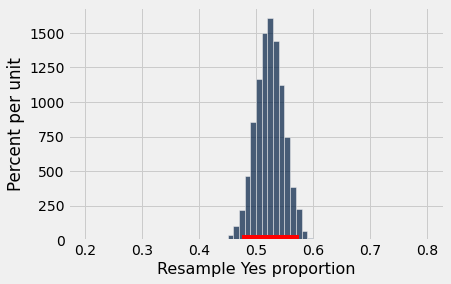

In [25]:
# Run this cell to plot your confidence interval.
Table().with_column("Resample Yes proportion", resample_yes_proportions).hist(bins=np.arange(.2, .8, .01))
plots.plot(make_array(lower_limit, upper_limit), make_array(0, 0), c='r', lw=10);

<div class="hide">\pagebreak</div>
Your confidence interval should overlap the number 0.5.  That means we can't be very sure whether Proposition 68 is winning, even though the sample Yes proportion is a bit above 0.5.

The Yes on 68 campaign really needs to know whether they're winning.  It's impossible to be absolutely sure without polling the whole population, but they'd be okay if the standard deviation of the sample mean were only 0.005.  They ask Michelle to run a new poll with a sample size that's large enough to achieve that.  (Polling is expensive, so the sample also shouldn't be bigger than necessary.)

Michelle consults Chapter 12 of your textbook.  Instead of making the conservative assumption that the population standard deviation is 0.5 (coding Yes voters as 1 and No voters as 0), she decides to assume that it's equal to the standard deviation of the sample,

$$\sqrt{(\text{Yes proportion in the sample}) \times (\text{No proportion in the sample})}.$$

Under that assumption, Michelle decides that a sample of 9,975 would suffice.

<div class="hide">\pagebreak</div>
#### Question 5
How did Michelle arrive at that answer? Please be clear in your steps/explanations.

Because out sample is large enough, we gan get the Standard deviation of 0.0049990

## 5. Do Diet Drinks Cause Weight Gain?


[Betteridge's Law](https://en.wikipedia.org/wiki/Betteridge's_law_of_headlines) notwithstanding, this is a serious question and a subject of much recent research.  Though artificially-sweetened diet drinks (like Diet Pepsi or a cup of coffee with sucralose) contain no calories, it is theorized that drinking sweet diet drinks could increase cravings for other sweet food, or that the artificial sweeteners in diet drinks (like aspartame and sucralose) could directly cause weight gain.  [This article](http://www.vox.com/2016/11/28/13764656/diet-soda-metabolism-weight-loss-obesity) summarizes some of the recent research activity.

In this exercise we'll use bootstrap confidence intervals to replicate some of the analysis in [this study](http://onlinelibrary.wiley.com/doi/10.1038/oby.2008.284/full).  For simplicity (and because we couldn't get our hands on the data), we'll work with a synthetic dataset, not the dataset used in the actual study.

The original dataset is called the San Antonio Heart Study.  It tracks 3,371 people living in San Antonio, Texas, over 7-8 years.  For each person, it records (among many other things) how many diet drinks they reported drinking in a typical week, and the change in the person's Body Mass Index (BMI, a measure of weight adjusted for height) between the start and the end of the 7-8 year period.  A change of 1 in BMI means that the person gained around 4-8 pounds, depending on their height.

In [26]:
diet = Table.read_table("diet.csv")
diet

ID,Typical diet drinks per week,BMI change
0,6,-4.40065
1,0,0.952995
2,4,2.71019
3,6,-0.276764
4,0,6.12079
5,3,-0.158611
6,0,-2.94134
7,0,-2.64784
8,0,7.0943
9,7,1.69633


#### Question 1
We will crudely divide people into two categories: those who consume any diet drinks, and those who consume none.  Create a table called `drink_or_not` that's a copy of `diet`, with an extra column called `"Drink"`.  It should contain the value `True` for people who drank at least one drink per week and `False` otherwise.

In [27]:
drink_or_not = diet.with_column("Drink", [True if i > 0 else False for i in diet.column("Typical diet drinks per week")])
drink_or_not

ID,Typical diet drinks per week,BMI change,Drink
0,6,-4.40065,True
1,0,0.952995,False
2,4,2.71019,True
3,6,-0.276764,True
4,0,6.12079,False
5,3,-0.158611,True
6,0,-2.94134,False
7,0,-2.64784,False
8,0,7.0943,False
9,7,1.69633,True


#### Question 2
Compute a table called `means` that looks like this, but with the `"BMI change mean"` column filled in according to its name:

|Drink|BMI change mean|
|-|-|
|False|?|
|True|?|

In [30]:
means = drink_or_not.group("Drink", np.mean).select("Drink", "BMI change mean")
means

Drink,BMI change mean
False,1.01925
True,1.50449


You should find that diet drinkers have a higher average BMI change - they gained more weight on average.  (The average for both groups is positive because most people gain a little weight as they get older.)

#### Question 3
Suppose our `diet` table is a random sample from the population of all people who lived during this 7-8 year period.  We want to know whether drinking diet drinks really makes a difference in BMI change.  Formulate appropriate null and alternative hypotheses for an hypothesis test, **or** (if appropriate) explain why no hypothesis test is needed.

**Null hypothesis:** The BMI has a very significant change

**Alternative hypothesis:** The BMI doesn't have a significant change

#### Question 4
Test your hypothesis.  Use a method that gives you an idea of *how big* the difference is between the two groups, not just whether there is a difference.  To get the best practice, try to do it without consulting the textbook and without too much trial and error.  If you're having trouble, try breaking the question into smaller steps (i.e. What method are you using? What's the first step to do that? etc.)

In [38]:
# If you use 5,000 bootstrap repetitions, it should take around a
# minute.
def drink_stantard_derivation(sample_bool, repetitions):
    mean_list = make_array()
    for _ in range(repetitions):
        sample = drink_or_not.select("Drink", "BMI change").where("Drink", are.equal_to(sample_bool)).sample().column("BMI change")
        sample_mean = np.mean(sample)
        mean_list =np.append(mean_list, sample_mean)
    return str(np.std(mean_list))

drinking = True
repetitions = 5000
print("Proportion: [%s, %s]" %(drink_stantard_derivation(drinking, repetitions), drink_stantard_derivation(not drinking, repetitions)))
    

Proportion: [0.07187425631476328, 0.07685060026148438]


#### Question 5
Do you accept or reject your null hypothesis?  Looking at your results, is there strong evidence that there is a big difference between the means of the two groups?

We reject our null hypothesis as we can see the is not that big of a change in the bmi if they drink diet or not

The study tracked many pieces of information about each individual.  The authors include the following table in their report, comparing diet-drinkers and non-diet-drinkers on various traits.  The traits were measured at the *start* of the 7-8 year observational period.

<img src="factors.gif"/>

#### Question 6
Using this table, Steve the Scientist makes the following argument:

> "People who drank diet drinks were much more likely (12.1% versus 33.4%) to say they were dieting at the start of the observational period.  So perhaps drinking diet drinks does not directly cause weight gain.  Instead, the association we observed in question 5 could be caused entirely by this confounding factor."

Is this a valid argument?

This is not a valid argument

In [ ]:
_ = ok.submit()

<IPython.core.display.Javascript object>